# Importing Packages

In [1]:
# General Packages
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D     # 3D Plotting
import matplotlib.patches as mpatches  # For creating manual legends
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

# For LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# For K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# For SVM
from sklearn.svm import LinearSVC

# For Decision Trees and Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Boosting
from sklearn.ensemble import AdaBoostClassifier

# Metrics
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, matthews_corrcoef, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc 
from sklearn.multiclass import OneVsRestClassifier

In [3]:
df_og = pd.read_csv("musicData.csv")

df_og.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


# EDA and Pre-processing

In [4]:
df_og.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [5]:
# Seeing how many unique values there are (10 genres)
df_og.nunique()

instance_id         50000
artist_name          6863
track_name          41699
popularity             99
acousticness         4193
danceability         1088
duration_ms         26028
energy               2085
instrumentalness     5131
key                    12
liveness             1646
loudness            17247
mode                    2
speechiness          1337
tempo               29394
obtained_date           5
valence              1615
music_genre            10
dtype: int64

In [6]:
# Seeing the total numnber of NaN values
df_og.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

## Dropping unnecessary Columns

In [7]:
# Dropping unnecessary columns from the DataFrame
data = df_og.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date'])

print(data.shape)

# Display the first few rows of the new DataFrame to ensure the columns are dropped
data.head()

(50005, 14)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [8]:
# Dropping the 5 NaN rows
data.dropna(inplace=True)

In [9]:
# Inspecting shape again to make sure
data.shape

(50000, 14)

## Handling "?" in Tempo column
Drop them as the distribution of genres remains uniform

In [10]:
# How many "?" in the tempo column = 4980
question_tempo = (data['tempo'] == '?').sum()

print(question_tempo)

4980


In [11]:
# Counting the number of rows for each genre in the 'music_genre' column
genre_counts = data['music_genre'].value_counts()

# Displaying the counts
print(genre_counts)

music_genre
Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: count, dtype: int64


/var/folders/14/d8fzd0c94rqd5rwglx3fw6d80000gn/T/ipykernel_2332/3028189882.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  genre_plot.set_xticklabels(genre_plot.get_xticklabels(), rotation=45, ha='right')


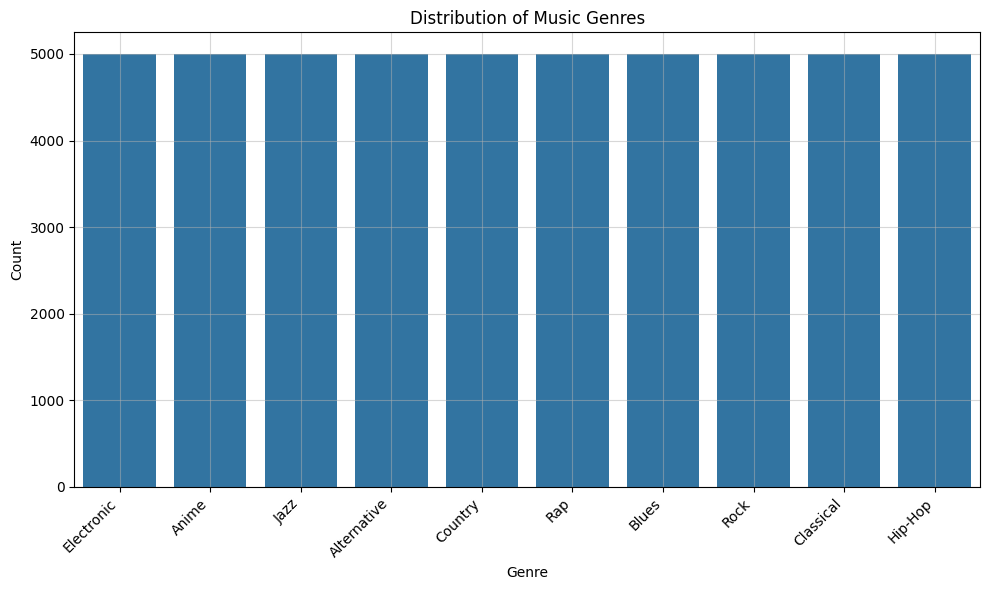

In [12]:
# Create a bar plot for the genre counts
plt.figure(figsize=(10, 6))
genre_plot = sns.countplot(data=data, x='music_genre', order=data['music_genre'].value_counts().index)

# Rotate x-axis labels for better readability
genre_plot.set_xticklabels(genre_plot.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Music Genres')
plt.grid(alpha = 0.5)
plt.tight_layout()
plt.show()

In [13]:
# Removing rows where the 'tempo' column has "?"
data = data[data['tempo'] != '?']

print(data.shape)

data.head()

(45020, 14)


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [14]:
# Counting the number of rows for each genre in the 'music_genre' column
genre_counts = data['music_genre'].value_counts()

# Displaying the counts
print(genre_counts)

music_genre
Rock           4561
Jazz           4521
Hip-Hop        4520
Rap            4504
Classical      4500
Anime          4497
Alternative    4495
Country        4486
Blues          4470
Electronic     4466
Name: count, dtype: int64


/var/folders/14/d8fzd0c94rqd5rwglx3fw6d80000gn/T/ipykernel_2332/2525454039.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  genre_plot.set_xticklabels(genre_plot.get_xticklabels(), rotation=45, ha='right')


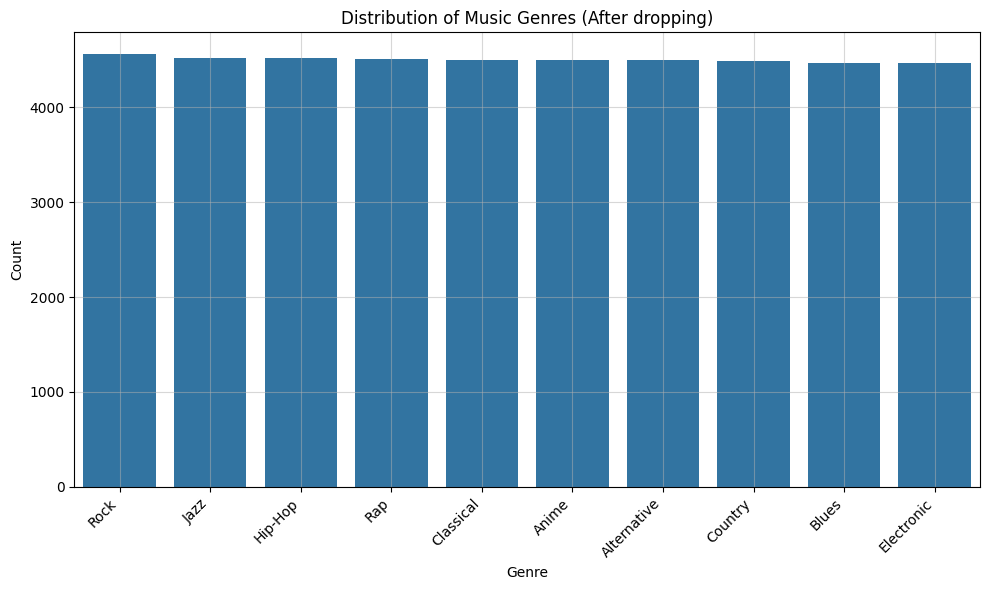

In [15]:
# Create a bar plot for the genre counts
plt.figure(figsize=(10, 6))
genre_plot = sns.countplot(data=data, x='music_genre', order=data['music_genre'].value_counts().index)

# Rotate x-axis labels for better readability
genre_plot.set_xticklabels(genre_plot.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Music Genres (After dropping)')
plt.grid(alpha = 0.5)
plt.tight_layout()

In [16]:
# 10 music generes
data.nunique()

popularity             99
acousticness         4130
danceability         1069
duration_ms         24280
energy               2037
instrumentalness     5053
key                    12
liveness             1635
loudness            16472
mode                    2
speechiness          1329
tempo               29393
valence              1612
music_genre            10
dtype: int64

## Changing Categorical to Numerical
- First, change mode to binary
- Second, change keys to ordinal
- Lastly, change genres to ordinal (a bit later)

In [17]:
# Convert 'mode' to a binary column where 'Major' is 1 and 'Minor' is 0
data['major'] = (data['mode'] == 'Major').astype(int)

# Drop the original 'mode' column as it's now redundant
data = data.drop(columns='mode')

# Display the first few rows to verify the changes
data.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,major
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,0.0748,100.889,0.759,Electronic,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,0.0345,127.994,0.333,Electronic,1
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,0.2390,128.014,0.270,Electronic,1
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,0.0413,145.036,0.323,Electronic,1


In [18]:
# Create a mapping dictionary for keys
key_mapping = {
    'A': 1, 'A#': 2, 'B': 3, 'C': 4, 'C#': 5, 'D': 6,
    'D#': 7, 'E': 8, 'F': 9, 'F#': 10, 'G': 11, 'G#': 12
}

# Replace the categorical keys with numerical values
data['key'] = data['key'].map(key_mapping)

# Check if all values in the 'key' column are numeric
are_all_values_numeric = data['key'].apply(lambda x: isinstance(x, (int, float))).all()

# Print the result
print("Are all values in 'key' column numeric? :", are_all_values_numeric)

# Display the first few rows to verify the changes
data.head()


Are all values in 'key' column numeric? : True


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,major
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,2,0.115,-5.201,0.0748,100.889,0.759,Electronic,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,6,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,12,0.534,-4.617,0.0345,127.994,0.333,Electronic,1
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,5,0.157,-4.498,0.2390,128.014,0.270,Electronic,1
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,10,0.157,-6.266,0.0413,145.036,0.323,Electronic,1


## Imputing values for negative duration
For values with negative duration, the mean of the genre's duration will be imputed

In [19]:
print((data["duration_ms"] == -1).sum())

4460


In [20]:
# Filter out rows where 'duration_ms' is -1
filtered_data = data[data['duration_ms'] > 0]

# Group by 'music_genre' and calculate mean and median durations
genre_duration_stats = filtered_data.groupby('music_genre')['duration_ms'].agg(mean_duration='mean', median_duration='median')

# Resetting index to make 'music_genre' a column
genre_duration_stats = genre_duration_stats.reset_index()

# Rounding mean and median durations to the nearest integer
genre_duration_stats['mean_duration'] = genre_duration_stats['mean_duration'].round().astype(int)
genre_duration_stats['median_duration'] = genre_duration_stats['median_duration'].round().astype(int)

# Display the resulting DataFrame
genre_duration_stats

,music_genre,mean_duration,median_duration
0,Alternative,233402,226207
1,Anime,231378,239941
2,Blues,253433,230346
3,Classical,310511,262676
4,Country,216708,211500
5,Electronic,269823,244966
6,Hip-Hop,219770,215040
7,Jazz,264351,247682
8,Rap,219016,214534
9,Rock,237045,225560


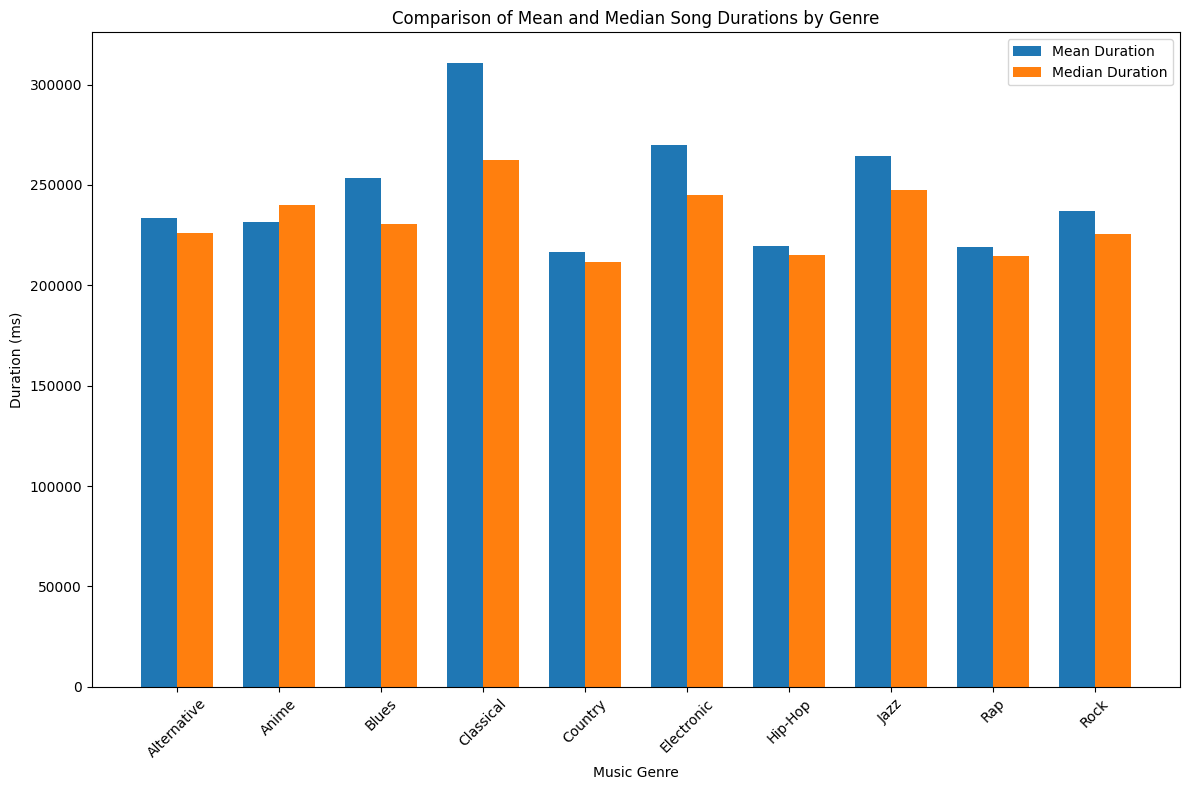

In [21]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Number of genres
n_genres = len(genre_duration_stats)
index = np.arange(n_genres)  # Array with elements 0,1,2,...,n_genres-1
bar_width = 0.35  # Width of the bars

# Plotting
plt.bar(index, genre_duration_stats['mean_duration'], bar_width, label='Mean Duration')
plt.bar(index + bar_width, genre_duration_stats['median_duration'], bar_width, label='Median Duration')

# Adding labels, title, and custom x-axis tick labels
plt.xlabel('Music Genre')
plt.ylabel('Duration (ms)')
plt.title('Comparison of Mean and Median Song Durations by Genre')
plt.xticks(index + bar_width / 2, genre_duration_stats['music_genre'])  # Positioning genre names in the center of grouped bars
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


In [22]:
# Calculate the median duration for each genre excluding '-1' values
medians = data[data['duration_ms'] > 0].groupby('music_genre')['duration_ms'].median()

# Function to impute duration
def impute_duration(row):
    if row['duration_ms'] == -1:
        return medians[row['music_genre']]
    else:
        return row['duration_ms']

# Apply the function to impute '-1' durations
data['duration_ms'] = data.apply(impute_duration, axis=1)

# Verify changes by checking if there are any '-1' left
print(data[data['duration_ms'] == -1])

Empty DataFrame
Columns: [popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, speechiness, tempo, valence, music_genre, major]
Index: []


In [23]:
# Create a mapping dictionary for genres
genre_mapping = {
    'Alternative': 1, 'Anime': 2, 'Blues': 3, 'Classical': 4, 'Country': 5,
    'Electronic': 6, 'Hip-Hop': 7, 'Jazz': 8, 'Rap': 9, 'Rock': 10
}

# Replace the categorical genre values with numerical codes
data['music_genre'] = data['music_genre'].map(genre_mapping)

# Display the first few rows to verify the changes
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,major
0,27.0,0.00468,0.652,244965.5,0.941,0.79200,2,0.115,-5.201,0.0748,100.889,0.759,6,0
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,6,0.124,-7.043,0.0300,115.00200000000001,0.531,6,0
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,12,0.534,-4.617,0.0345,127.994,0.333,6,1
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,5,0.157,-4.498,0.2390,128.014,0.270,6,1
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,10,0.157,-6.266,0.0413,145.036,0.323,6,1


## Correlation Matrix

In [24]:
# Calculating the correlation matrix
corr_matrix = data.corr()

# Finding pairs of variables with correlation >= 0.3 and not the same
rows = []
for row in corr_matrix.columns:
    for col in corr_matrix.index:
        if (corr_matrix.at[row, col] >= 0.3) and (row != col):
            # Avoiding duplication by checking if pair has been added reversed
            if not any((high_corr['Variable 1'] == col) & (high_corr['Variable 2'] == row) for idx, high_corr in enumerate(rows)):
                rows.append({
                    'Variable 1': row,
                    'Variable 2': col,
                    'Correlation': corr_matrix.at[row, col]
                })

# Creating a DataFrame from the list of rows
high_corr_var = pd.DataFrame(rows)

# Sorting the DataFrame by correlation value, in descending order
high_corr_var = high_corr_var.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

high_corr_var

,Variable 1,Variable 2,Correlation
0,energy,loudness,0.838503
1,popularity,music_genre,0.502620
2,danceability,valence,0.433316
3,energy,valence,0.397014
4,danceability,loudness,0.390295
5,acousticness,instrumentalness,0.390010
6,popularity,danceability,0.357465
7,loudness,valence,0.342019
8,popularity,loudness,0.319556
9,danceability,music_genre,0.302730


## Visualization of the distribution of variables

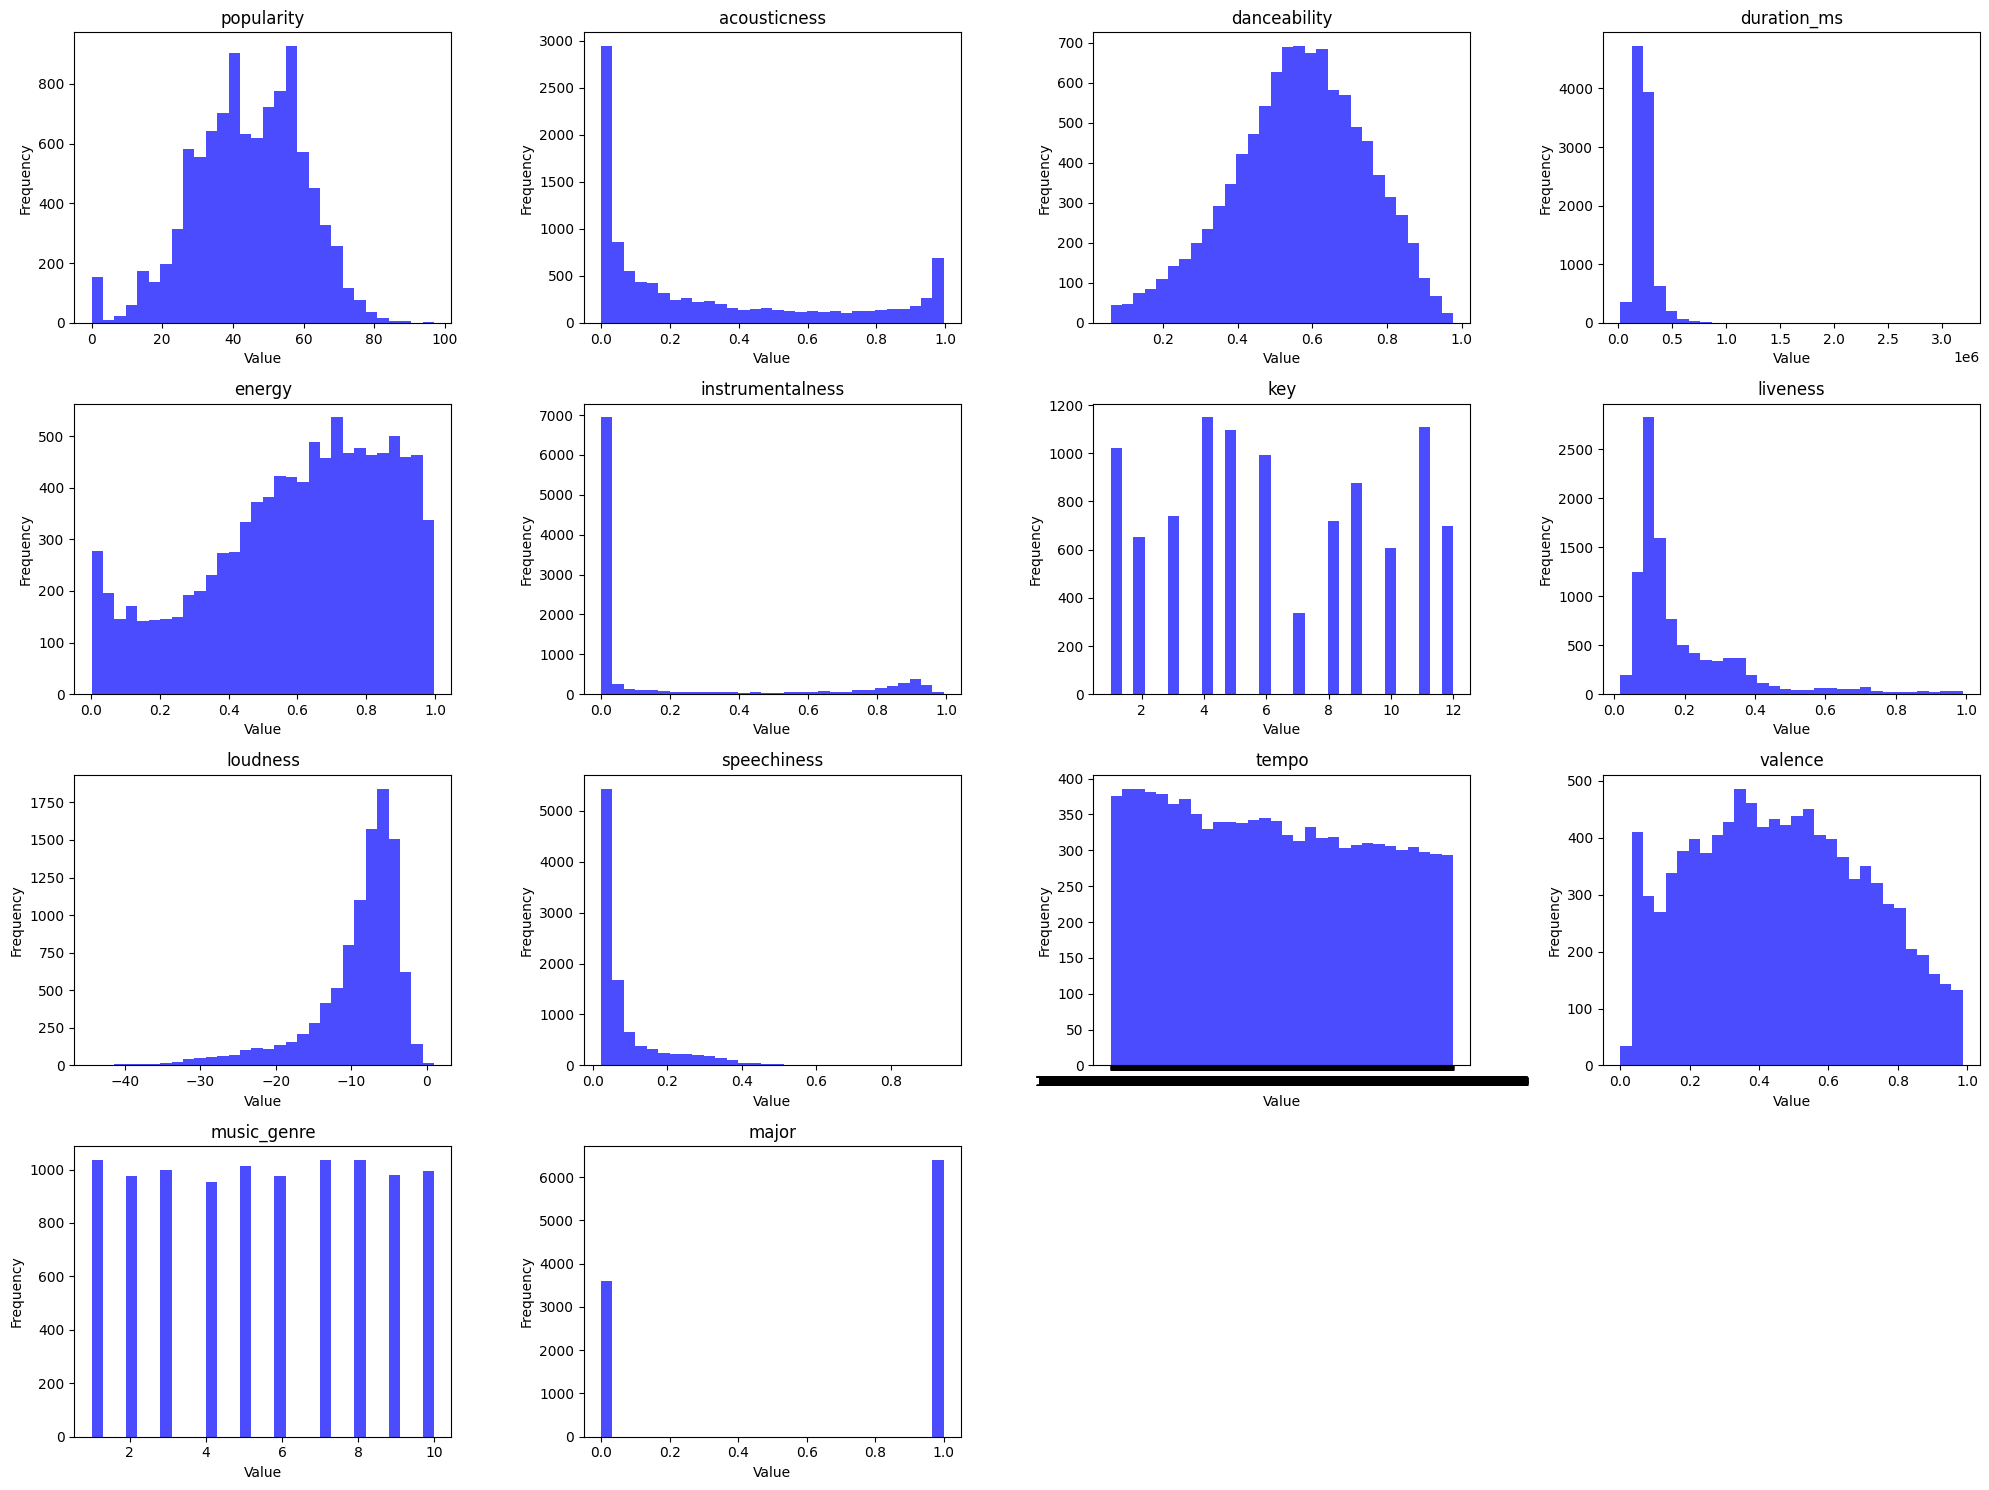

In [25]:
# Sample a subset of the data for quicker visualization
data_sample = data.sample(n=10000, random_state=13604503)  # Sample 10,000 data points

# Setup for the grid of histograms
num_variables = data_sample.shape[1]
num_rows = 4
num_cols = 4

plt.figure(figsize=(20, 15))

for index, column in enumerate(data_sample.columns):
    ax = plt.subplot(num_rows, num_cols, index + 1)
    ax.hist(data_sample[column], bins=30, color='blue', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Scaling and Train/Test Split

In [26]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# List of columns to be scaled
columns_to_scale = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 
                    'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Scale the data for the specified columns
data_scaled_values = scaler.fit_transform(data[columns_to_scale])

# Create a new DataFrame for the scaled values
data_scaled = pd.DataFrame(data_scaled_values, columns=columns_to_scale)

# Copy the unscaled columns to the new DataFrame
for col in data.columns:
    if col not in columns_to_scale:
         data_scaled[col] = data[col].values  # Copy the data to avoid SettingWithCopyWarning
 
data_scaled.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key,music_genre,major
0,-1.109911,-0.884378,0.522585,0.007826,1.290882,1.872550,-0.488216,0.639344,-0.187086,-0.622164,1.224343,2,6,0
1,-0.852739,-0.860885,0.354853,-0.246872,1.098070,2.357446,-0.432561,0.340140,-0.628606,-0.161578,0.301856,6,6,0
2,-1.045618,-0.889123,0.343671,-0.272463,0.587686,-0.521854,2.102795,0.734206,-0.584257,0.262424,-0.499252,12,6,1
3,-0.659860,-0.823684,1.204697,-0.737866,0.379752,-0.550303,-0.228496,0.753536,1.431165,0.263077,-0.754150,5,6,1
4,-0.788446,-0.884466,0.444310,-0.207950,-0.047459,2.231618,-0.228496,0.466352,-0.517241,0.818601,-0.539712,10,6,1


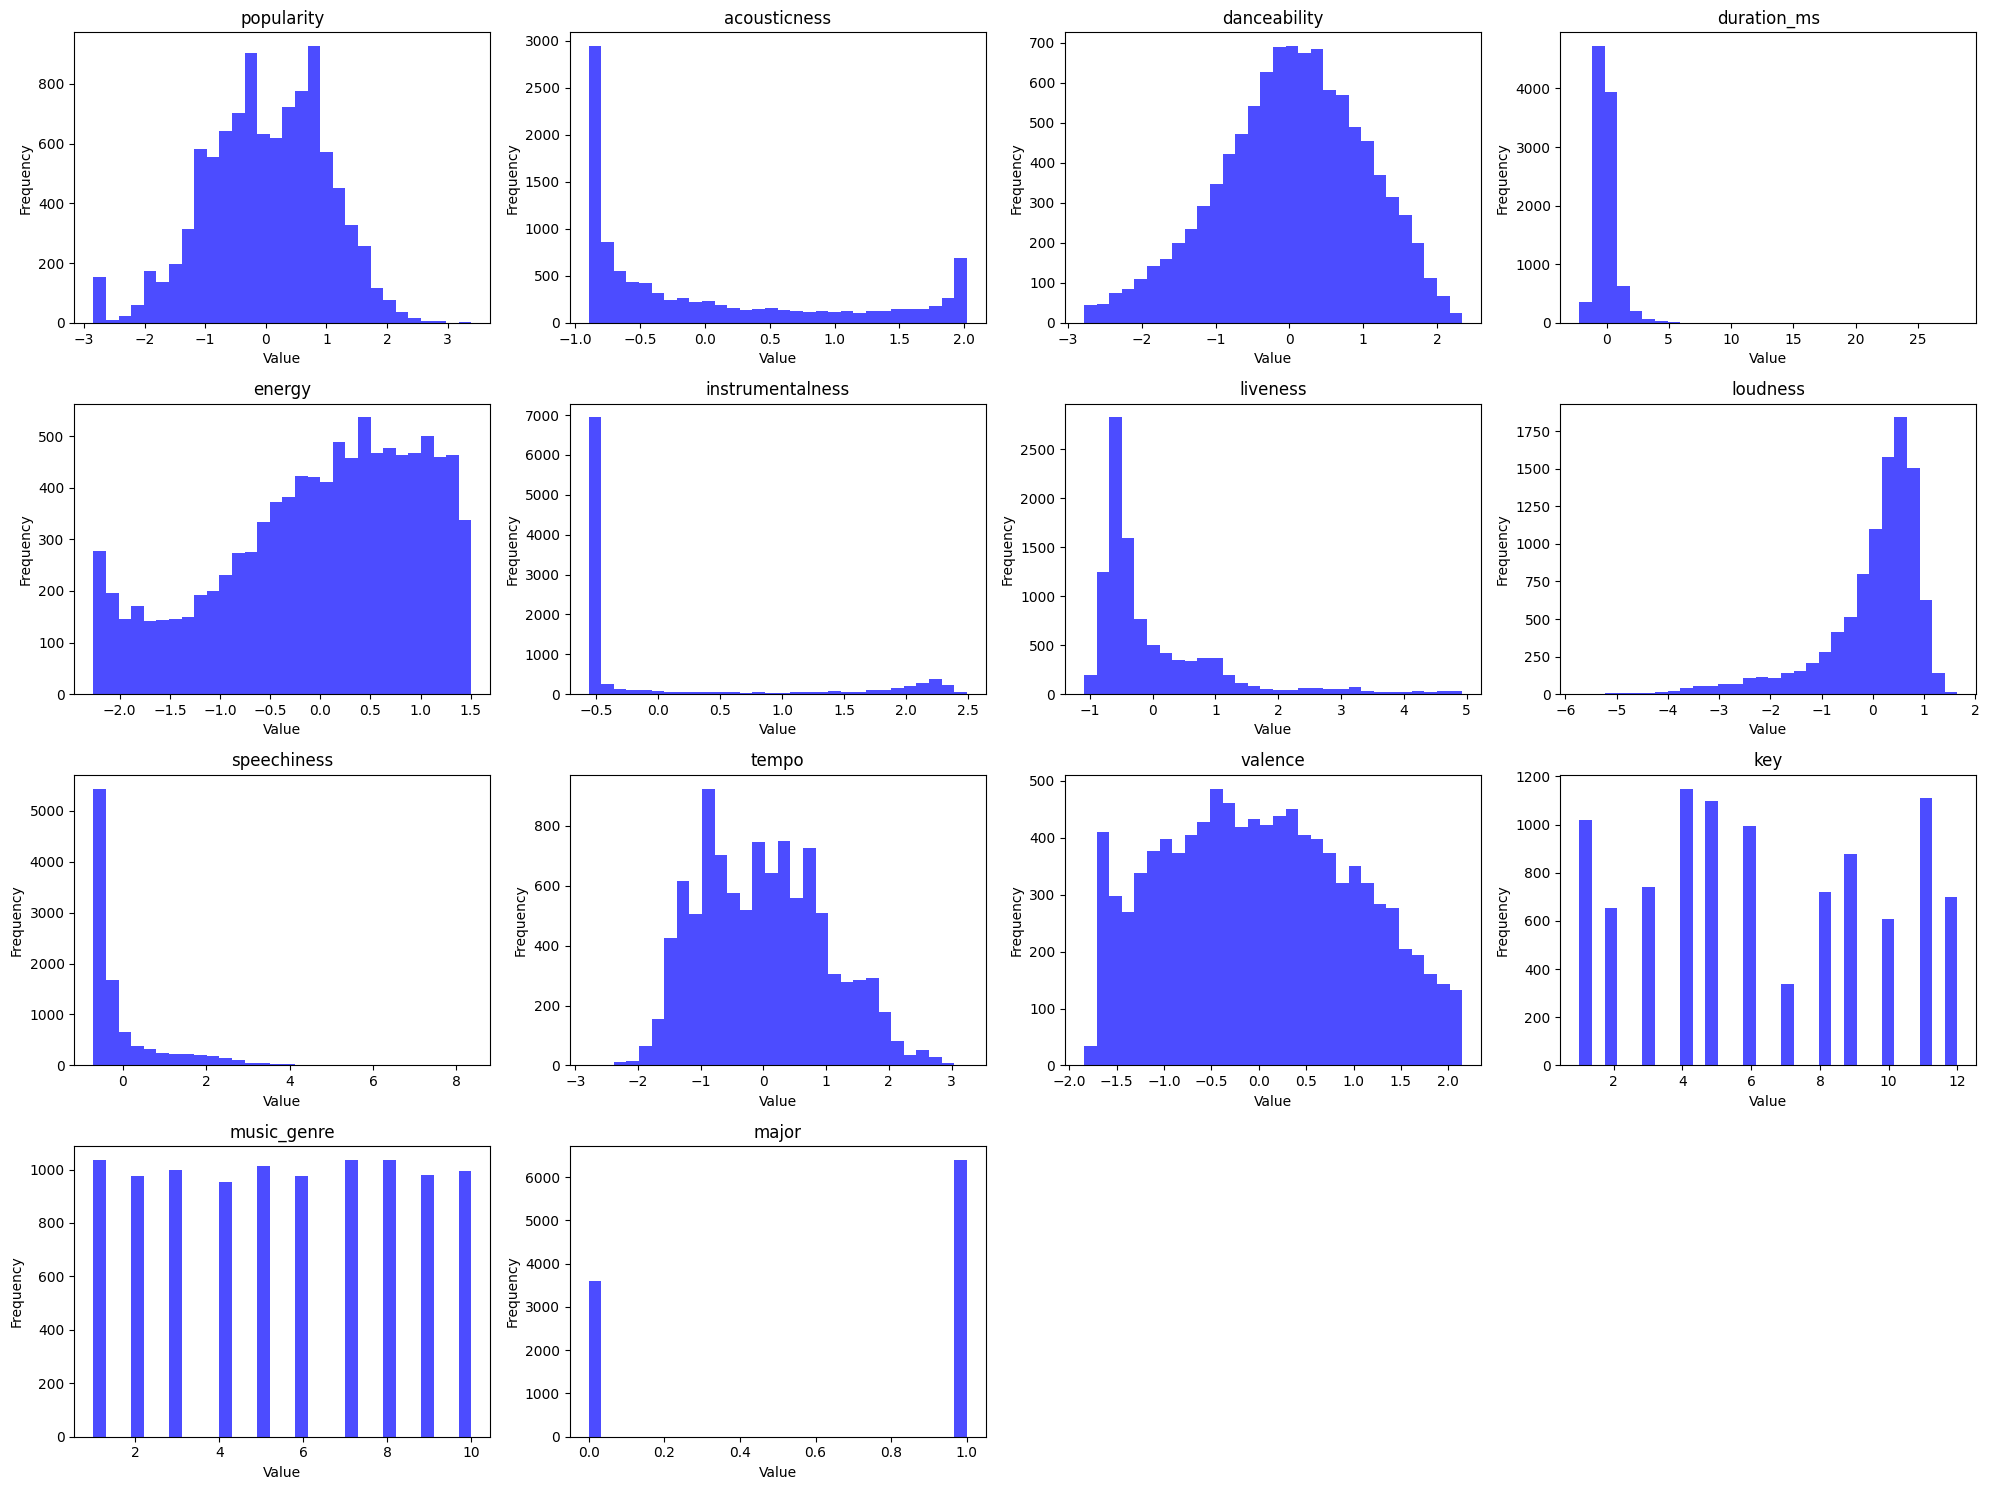

In [27]:
# Sample a subset of the data for quicker visualization
data_sample = data_scaled.sample(n=10000, random_state=13604503)  # Sample 10,000 data points

plt.figure(figsize=(20, 15))

for index, column in enumerate(data_sample.columns):
    ax = plt.subplot(num_rows, num_cols, index + 1)
    ax.hist(data_sample[column], bins=30, color='blue', alpha=0.7)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
# Initialize empty DataFrames for features and labels of training and testing
X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.Series()
y_test = pd.Series()

# Loop through each genre
for genre in range(1, 11):  # Genres are 1 to 10
    # Filter data for the current genre
    genre_data = data[data['music_genre'] == genre]
    
    # Split features and labels
    X = genre_data.drop('music_genre', axis=1)  # all columns except 'music_genre'
    y = genre_data['music_genre']  # only the 'music_genre' column
    
    # Split the genre_data into train and test
    X_genre_train, X_genre_test, y_genre_train, y_genre_test = train_test_split(X, y, test_size=500, random_state=13604503, shuffle=True)
    
    # Append the split data into the train and test DataFrames/Series
    X_train = pd.concat([X_train, X_genre_train])
    X_test = pd.concat([X_test, X_genre_test])
    y_train = pd.concat([y_train, y_genre_train])
    y_test = pd.concat([y_test, y_genre_test])

# Reset index for cleanliness
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Check the sizes to ensure correctness
print(f"X_train size: {X_train.shape}")
print(f"X_test size: {X_test.shape}")
print(f"y_train size: {y_train.shape}")
print(f"y_test size: {y_test.shape}")

# Quick check to see the distribution of genres in both y_train and y_test
print("Training labels genre distribution:\n", y_train.value_counts())
print("Testing labels genre distribution:\n", y_test.value_counts())


X_train size: (40020, 13)
X_test size: (5000, 13)
y_train size: (40020,)
y_test size: (5000,)
Training labels genre distribution:
 10    4061
8     4021
7     4020
9     4004
4     4000
2     3997
1     3995
5     3986
3     3970
6     3966
Name: count, dtype: int64
Testing labels genre distribution:
 1     500
2     500
3     500
4     500
5     500
6     500
7     500
8     500
9     500
10    500
Name: count, dtype: int64


/var/folders/14/d8fzd0c94rqd5rwglx3fw6d80000gn/T/ipykernel_2332/381269711.py:22: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_train = pd.concat([y_train, y_genre_train])
/var/folders/14/d8fzd0c94rqd5rwglx3fw6d80000gn/T/ipykernel_2332/381269711.py:23: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  y_test = pd.concat([y_test, y_genre_test])


# Dimensionality Reduction: LDA

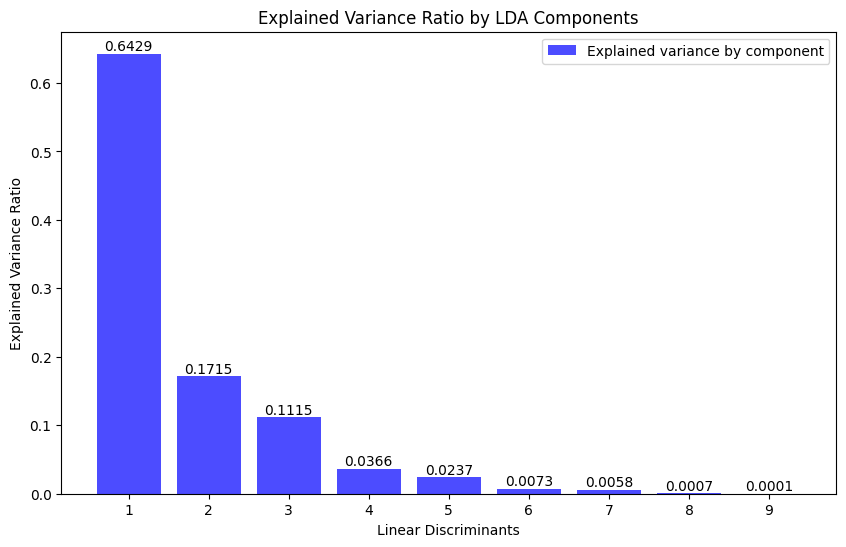

In [29]:
# Initialize LDA
lda = LinearDiscriminantAnalysis()

# Fit LDA to the scaled training data
X_lda = lda.fit_transform(X_train, y_train)

# Explained variance ratio
explained_variance_ratio = lda.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='blue', label='Explained variance by component')

# Adding text labels above the bars
for bar, variance in zip(bars, explained_variance_ratio):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(variance, 4), ha='center', va='bottom')  # Adjust vertical alignment if needed

plt.xlabel('Linear Discriminants')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by LDA Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.show()

In [30]:
# Create a DataFrame and round the explained variance ratio to 3 decimal places
variance_df = pd.DataFrame({
    'Component': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio
}).round(3)  # Here is the rounding applied to the entire DataFrame

# Display the DataFrame
variance_df

,Component,Explained Variance Ratio
0,1,0.643
1,2,0.171
2,3,0.111
3,4,0.037
4,5,0.024
5,6,0.007
6,7,0.006
7,8,0.001
8,9,0.000


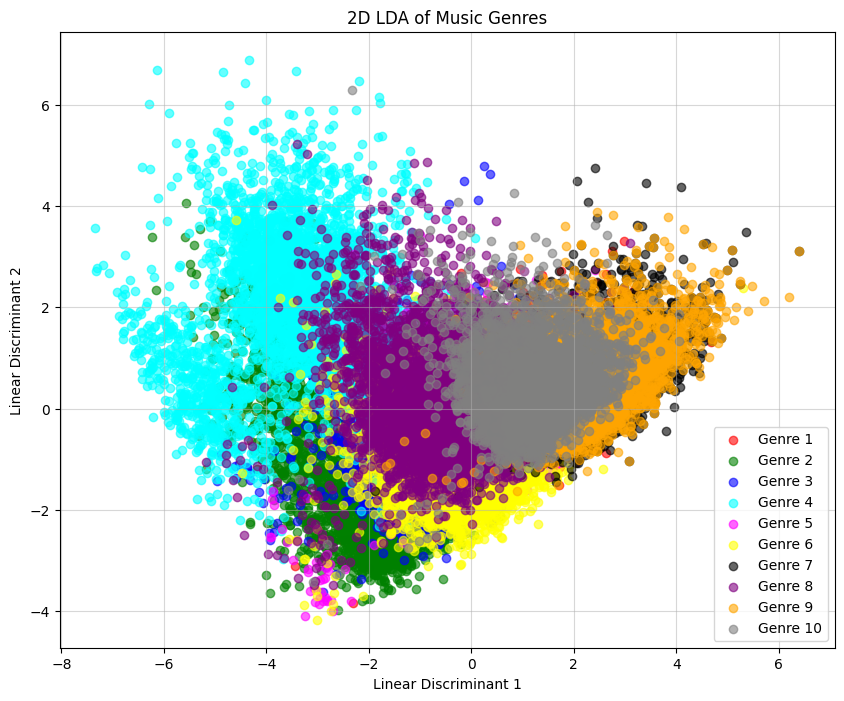

In [31]:
# Initialize LDA with two components
lda = LinearDiscriminantAnalysis(n_components=2)
# Fitting LDA to the training data
X_lda = lda.fit_transform(X_train, y_train)

# Colors array for up to 10 different genres
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'grey']

# Plotting
plt.figure(figsize=(10, 8))
for i, color in zip(range(1, 11), colors):  # Assuming labels are from 1 to 10
    plt.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], alpha=0.6, color=color,
                label=f'Genre {i}')
plt.title('2D LDA of Music Genres')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(loc='best')
plt.grid(alpha = 0.5)
plt.show()


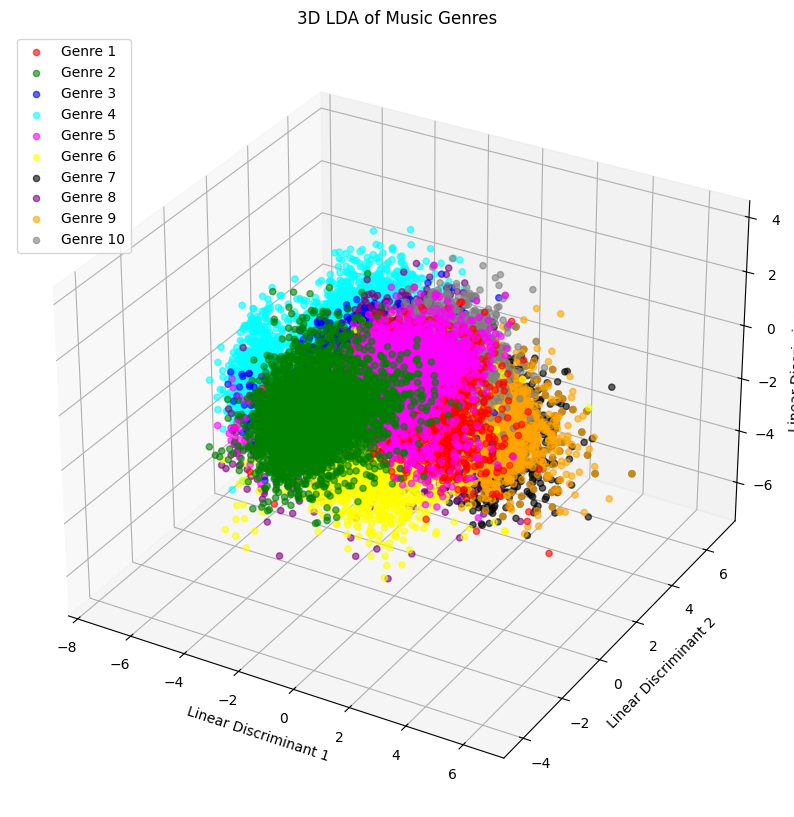

In [32]:
# Initialize LDA with three components
lda = LinearDiscriminantAnalysis(n_components=3)

# Fitting LDA to the training data -- basically X_lda_training
X_lda = lda.fit_transform(X_train, y_train)

# Transform the test data using the fitted LDA to create X_test_lda
X_test_lda = lda.transform(X_test)

# Plotting
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D plotting axis
for i, color in zip(range(1, 11), colors):  # Assuming labels are from 1 to 10
    ax.scatter(X_lda[y_train == i, 0], X_lda[y_train == i, 1], X_lda[y_train == i, 2], 
               alpha=0.6, color=color, label=f'Genre {i}')

    
ax.set_title('3D LDA of Music Genres')
ax.set_xlabel('Linear Discriminant 1')
ax.set_ylabel('Linear Discriminant 2')
ax.set_zlabel('Linear Discriminant 3')
plt.legend(loc='upper left')
plt.show()

# Clustering

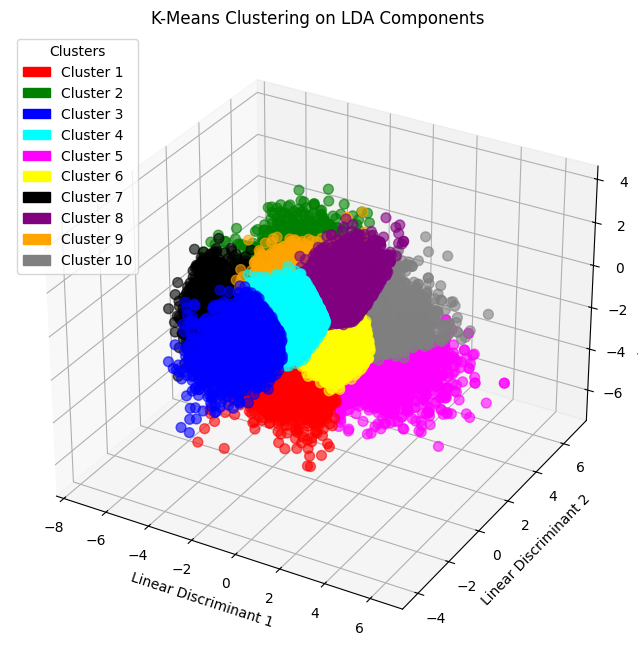

In [33]:
# Initialize KMeans
kmeans = KMeans(n_clusters=10, random_state=13604503)

# Fit KMeans on the LDA output
kmeans.fit(X_lda)

# Get cluster labels for each data point
labels = kmeans.labels_

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the LDA components colored by cluster label
for i in range(10):  # Loop over each cluster
    ax.scatter(X_lda[labels == i, 0], X_lda[labels == i, 1], X_lda[labels == i, 2],
               color=colors[i], label=f'Cluster {i+1}', s=50, alpha=0.6)

# Create a legend for each color using patch handles
legend_handles = [mpatches.Patch(color=colors[i], label=f'Cluster {i+1}') for i in range(10)]
ax.legend(handles=legend_handles, loc='upper left', title="Clusters")

# Titles and labels
ax.set_title('K-Means Clustering on LDA Components')
ax.set_xlabel('Linear Discriminant 1')
ax.set_ylabel('Linear Discriminant 2')
ax.set_zlabel('Linear Discriminant 3')

plt.show()

# First Classification Model: SVM

In [34]:
# Define the model
svm = LinearSVC(dual=False, max_iter=10000, random_state=13604503)  # Increased max_iter for convergence

### Finding the best C value ###
# Define a range of C values to test
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Setup GridSearchCV with a scoring function that makes sense for multiclass
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV using the LDA-transformed data
grid_search.fit(X_lda, y_train)  # No need for sample weights as class distribution is uniform

# Best C value
best_C = grid_search.best_params_['C']
print(f"Best C value: {best_C}\n")

### Building the Model with the Best C value ###

# Re-train the model with the best C value using the LDA-transformed data
svm_best = LinearSVC(C=best_C, dual=False, max_iter=10000, random_state=13604503)
svm_best.fit(X_lda, y_train)

# Calculate and print training and testing set accuracy using the .score() method
acc_training_svm = round(svm_best.score(X_lda, y_train), 4)
acc_test_svm = round(svm_best.score(X_test_lda, y_test), 4)

print(f"Accuracy on training set: {acc_training_svm}")
print(f"Accuracy on test set: {acc_test_svm}")


Best C value: 10

Accuracy on training set: 0.4447
Accuracy on test set: 0.4456


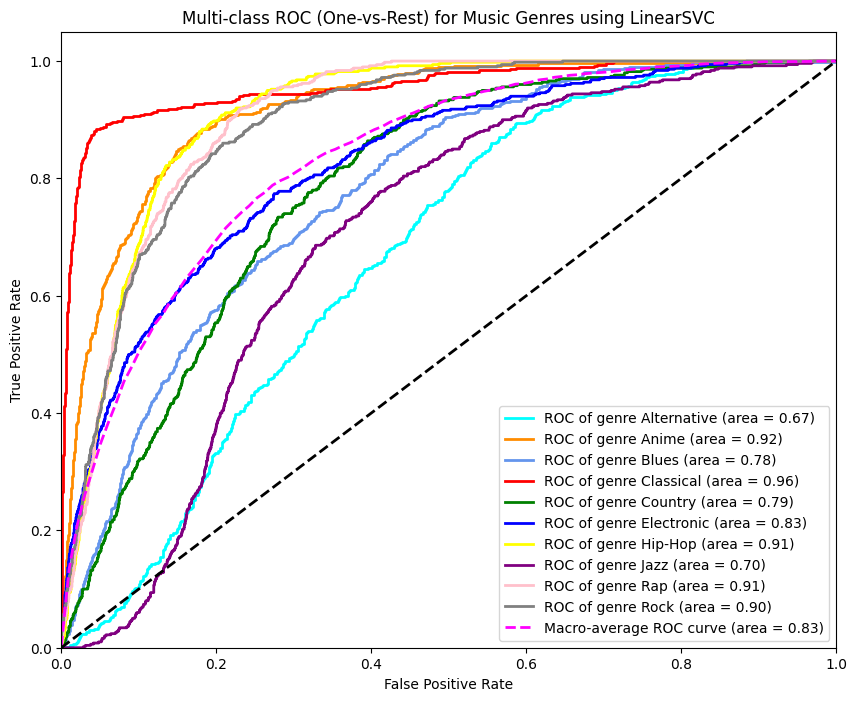

In [35]:
# Inverse mapping from numeric codes to genre names
inverse_genre_mapping = {v: k for k, v in genre_mapping.items()}

# Binarize the output for multiclass ROC analysis
classes = np.arange(1, 11)
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_train_bin.shape[1]

# Re-train the One-vs-Rest classifier using the pre-trained LinearSVC with the best parameters
classifier = OneVsRestClassifier(LinearSVC(C=best_C, dual=False, max_iter=10000, random_state=13604503))
classifier.fit(X_lda, y_train_bin)

# Compute ROC curve and ROC area for each class using the decision function on transformed test data
fpr = dict()
tpr = dict()
roc_auc = dict()
all_fpr = np.linspace(0, 1, 100)  # Define a common threshold scale for all classes

y_score = classifier.decision_function(X_test_lda)  # Use transformed X_test_lda
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate the macro-average ROC curve and AUC
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
macro_auc = auc(all_fpr, mean_tpr)

# Plot all ROC curves including the macro-average
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'yellow', 'purple', 'pink', 'gray']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC of genre {0} (area = {1:0.2f})'.format(inverse_genre_mapping[classes[i]], roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(all_fpr, mean_tpr, color='magenta', linestyle='--', lw=2,
         label='Macro-average ROC curve (area = {0:0.2f})'.format(macro_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC (One-vs-Rest) for Music Genres using LinearSVC')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Predictions for the test set using the best SVM classifier
preds_svm = svm_best.predict(X_test_lda)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, preds_svm))


Classification Report:
              precision    recall  f1-score   support

           1       0.38      0.06      0.10       500
           2       0.46      0.70      0.55       500
           3       0.43      0.20      0.27       500
           4       0.60      0.88      0.71       500
           5       0.34      0.30      0.32       500
           6       0.49      0.57      0.53       500
           7       0.40      0.49      0.44       500
           8       0.37      0.08      0.13       500
           9       0.42      0.37      0.40       500
          10       0.40      0.80      0.53       500

    accuracy                           0.45      5000
   macro avg       0.43      0.45      0.40      5000
weighted avg       0.43      0.45      0.40      5000



# Second Classification Method: Random Trees

In [37]:
# Define the classifier without the max_depth parameter
clf = RandomForestClassifier(n_estimators=500, 
                             max_samples=0.1, 
                             max_features="sqrt",
                             bootstrap=True, 
                             criterion='gini',
                             random_state=13604503)

# Set up the parameter grid for max_depth -- best is 15
param_grid = {
    'max_depth': [None, 5, 10, 15, 20]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_depth = best_params['max_depth']
print(f"Best max_depth: {best_depth}\n")


Best max_depth: 15



In [38]:
# Use the best parameters to create a new classifier
clf = RandomForestClassifier(n_estimators=500, 
                             max_samples=0.1, 
                             max_features="sqrt",
                             max_depth=best_depth, 
                             bootstrap=True, 
                             criterion='gini',
                             random_state=13604503)

# Fit the classifier with the best parameter
clf.fit(X_train, y_train)

# Training and testing set accuracy
acc_training_rf = round(clf.score(X_train, y_train), 4)
acc_test_rf = round(clf.score(X_test, y_test), 4)

print(f"Accuracy on training set: {acc_training_rf}")
print(f"Accuracy on test set: {acc_test_rf}")

Accuracy on training set: 0.7053
Accuracy on test set: 0.5856


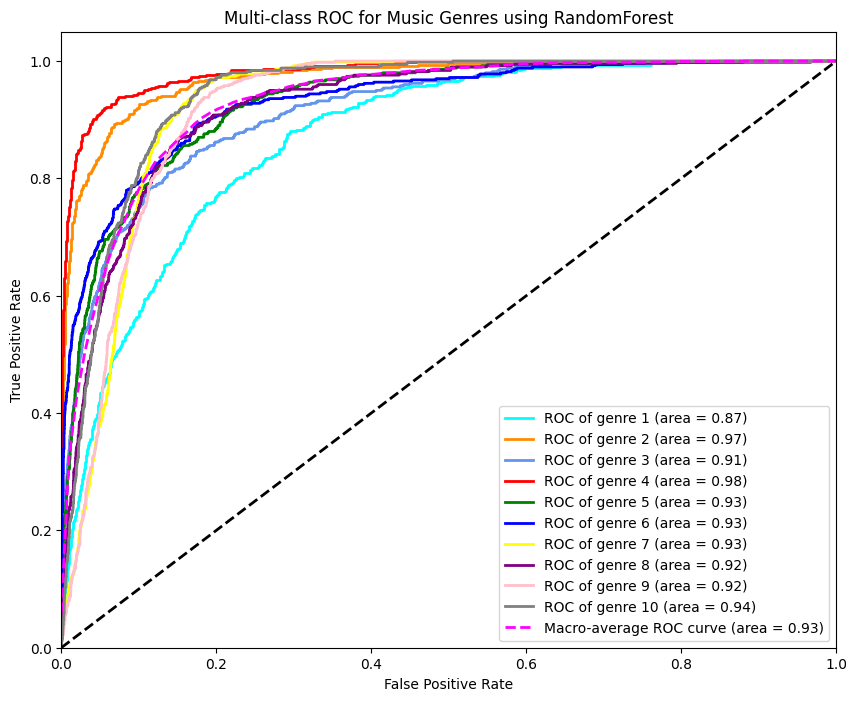


Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.35      0.42       500
           2       0.76      0.75      0.75       500
           3       0.64      0.53      0.58       500
           4       0.83      0.86      0.85       500
           5       0.60      0.59      0.60       500
           6       0.69      0.60      0.64       500
           7       0.41      0.45      0.43       500
           8       0.56      0.56      0.56       500
           9       0.42      0.40      0.41       500
          10       0.49      0.77      0.60       500

    accuracy                           0.59      5000
   macro avg       0.59      0.59      0.58      5000
weighted avg       0.59      0.59      0.58      5000



In [39]:
# Predictions for the test set
preds = clf.predict(X_test)

# Predict probabilities for each class
y_pred_proba_rf = clf.predict_proba(X_test)

# Binarize the output for multiclass ROC analysis
classes = np.arange(1, 11)  # classes are labeled from 1 to 10
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
all_fpr = np.linspace(0, 1, 100)  # Define a common threshold scale for all classes

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate the macro-average ROC curve and AUC
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

# Plot ROC curves for each class and the macro-average
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'yellow', 'purple', 'pink', 'gray']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC of genre {0} (area = {1:0.2f})'.format(i+1, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(all_fpr, mean_tpr, color='magenta', linestyle='--', lw=2,
         label='Macro-average ROC curve (area = {0:0.2f})'.format(macro_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Music Genres using RandomForest')
plt.legend(loc="lower right")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, preds))

In [40]:
# Feature Importance
feature_importances_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': clf.feature_importances_
}).sort_values('Importance', ascending=False)

feature_importances_rf.head(10)

,Feature,Importance
0,popularity,0.180966
8,loudness,0.094464
9,speechiness,0.093776
2,danceability,0.091490
1,acousticness,0.090205
5,instrumentalness,0.084771
4,energy,0.078382
3,duration_ms,0.069559
11,valence,0.067864
10,tempo,0.053992



The best predictor of music genre is: popularity with an importance of 0.181


/var/folders/14/d8fzd0c94rqd5rwglx3fw6d80000gn/T/ipykernel_2332/2303386203.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_rf.head(10), palette='Blues_d')


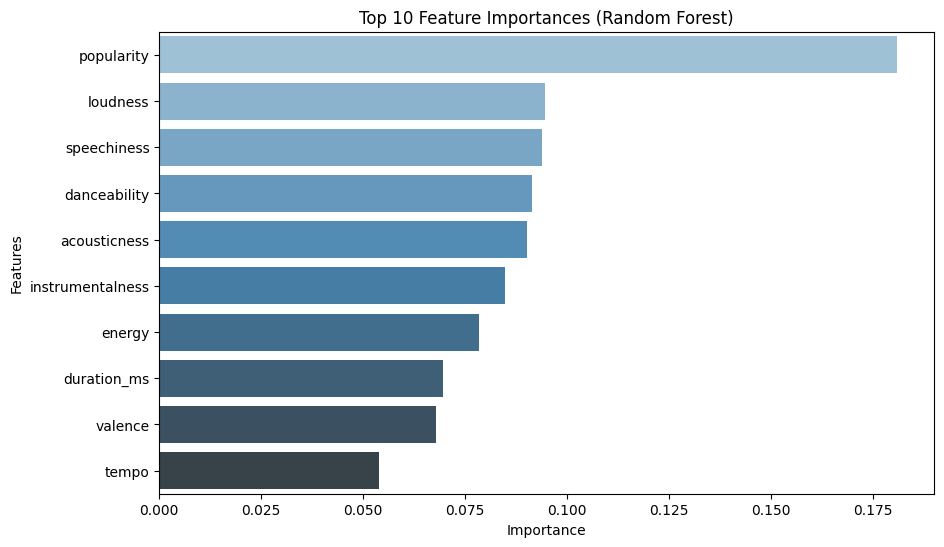

In [41]:
# Identifying the best predictor
best_predictor_rf = feature_importances_rf.iloc[0]['Feature']
print(f"\nThe best predictor of music genre is: {best_predictor_rf} with an importance of {feature_importances_rf.iloc[0]['Importance']:.3f}")

# Plotting Top 10 Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf.head(10), palette='Blues_d')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Using LDA data

In [42]:
# Define the classifier without the max_depth parameter
clfrf_lda = RandomForestClassifier(n_estimators=500, 
                                   max_samples=0.1, 
                                   max_features="sqrt",
                                   bootstrap=True, 
                                   criterion='gini',
                                   random_state=13604503)

# Set up the parameter grid for max_depth
param_grid = {
    'max_depth': [None, 5, 10, 15, 20]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=clfrf_lda, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the LDA-transformed training data
grid_search.fit(X_lda, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_depth_lda = best_params['max_depth']
print(f"Best max_depth: {best_depth_lda}\n")

Best max_depth: 10



In [43]:
# Use the best parameters to create a new classifier
clfrf_lda = RandomForestClassifier(n_estimators=500, 
                                   max_samples=0.1, 
                                   max_features="sqrt",
                                   max_depth=best_depth_lda, 
                                   bootstrap=True, 
                                   criterion='gini',
                                   random_state=13604503)

# Fit the classifier with the best parameter to the LDA-transformed training data
clfrf_lda.fit(X_lda, y_train)

# Training and testing set accuracy
acc_training_rf_lda = round(clfrf_lda.score(X_lda, y_train), 4)
acc_test_rf_lda = round(clfrf_lda.score(X_test_lda, y_test), 4)

print(f"Accuracy on training set: {acc_training_rf_lda}")
print(f"Accuracy on test set: {acc_test_rf_lda}")

Accuracy on training set: 0.5352
Accuracy on test set: 0.5016


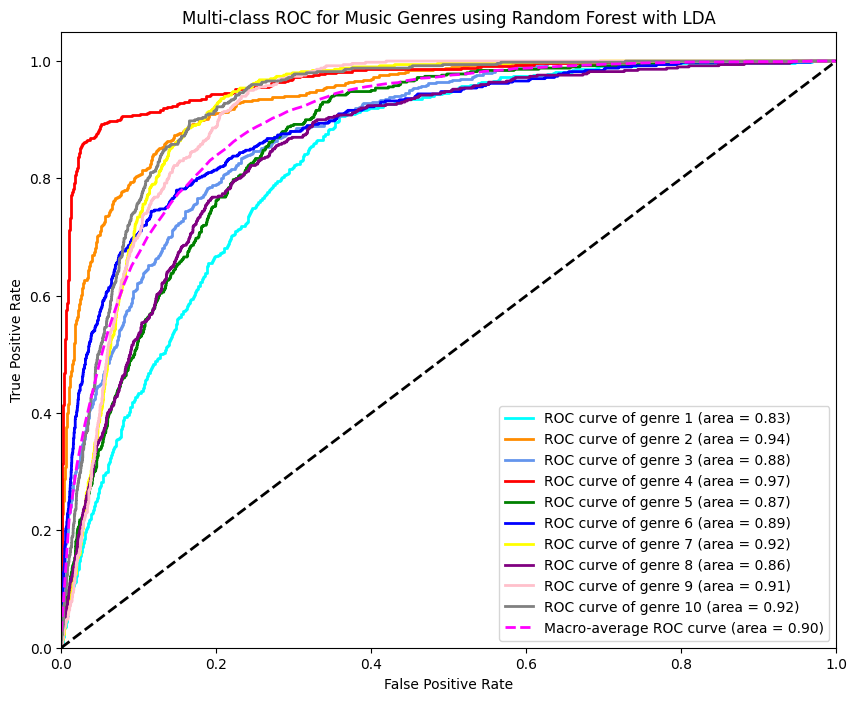


Classification Report:
              precision    recall  f1-score   support

           1       0.35      0.25      0.29       500
           2       0.68      0.61      0.64       500
           3       0.51      0.44      0.47       500
           4       0.82      0.84      0.83       500
           5       0.39      0.39      0.39       500
           6       0.56      0.53      0.54       500
           7       0.40      0.48      0.44       500
           8       0.41      0.39      0.40       500
           9       0.42      0.36      0.39       500
          10       0.47      0.73      0.57       500

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.50      0.50      0.50      5000



In [44]:
# Predictions for the test set using the RandomForest classifier trained on LDA data
preds_lda = clfrf_lda.predict(X_test_lda)

# Predict probabilities for each class using the classifier
y_pred_proba_rf_lda = clfrf_lda.predict_proba(X_test_lda)

# Binarize the output for multiclass ROC analysis
classes = np.arange(1, 11)  # classes are labeled from 1 to 10
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
all_fpr = np.linspace(0, 1, 100)  # Define a common threshold scale for all classes

# Calculate ROC curve for each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_rf_lda[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate the macro-average ROC curve and AUC
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

# Plot the ROC curves for each class and the macro-average
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'yellow', 'purple', 'pink', 'gray']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of genre {0} (area = {1:0.2f})'.format(i+1, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(all_fpr, mean_tpr, color='magenta', linestyle='--', lw=2,
         label='Macro-average ROC curve (area = {0:0.2f})'.format(macro_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Music Genres using Random Forest with LDA')
plt.legend(loc="lower right")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, preds_lda))


# Third Classification Method: AdaBoosting

In [45]:
# Define the AdaBoost classifier with a decision tree as its base estimator
estimator = DecisionTreeClassifier(random_state=13604503)

# AdaBoost classifier with default settings initially
clf_ab = AdaBoostClassifier(estimator=estimator, n_estimators=100, random_state=13604503)

# Parameters grid to test for the decision tree estimator within AdaBoost -- best is 10
param_grid = {
    'estimator__max_depth': [1, 2, 3, 4, 5, 10]
}

# Create the GridSearchCV object to find the best tree depth
grid_search = GridSearchCV(estimator=clf_ab, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and depth found
best_params = grid_search.best_params_
best_depth = best_params['estimator__max_depth']
print(f"Best max_depth for base estimator: {best_depth}\n")


Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/anaconda3/envs/fml/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/fml/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/fml/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/envs/fml/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

Best max_depth for base estimator: 10



In [46]:
# Use the best depth to create a new AdaBoost classifier
best_clf_ab = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=7, random_state=13604503),
    n_estimators=100,
    random_state=13604503
)

# Fit the classifier with the best parameter
best_clf_ab.fit(X_train, y_train)

# Calculate and print training and testing set accuracy
acc_training_ab = round(best_clf_ab.score(X_train, y_train), 4)
acc_test_ab = round(best_clf_ab.score(X_test, y_test), 4)

print(f"Accuracy on training set: {acc_training_ab}")
print(f"Accuracy on test set: {acc_test_ab}")

/opt/anaconda3/envs/fml/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy on training set: 0.6319
Accuracy on test set: 0.5246


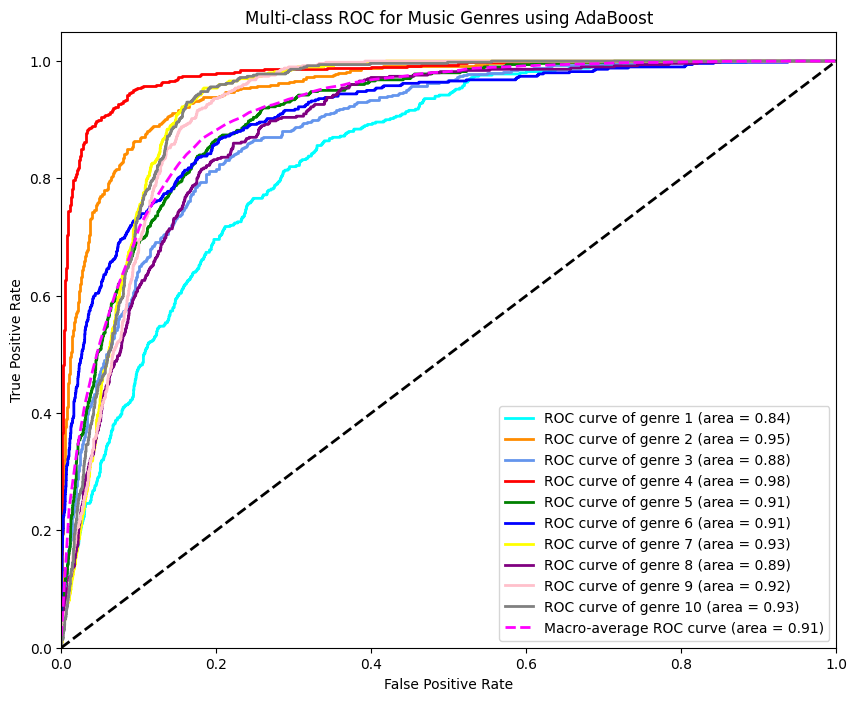


Classification Report:
              precision    recall  f1-score   support

           1       0.38      0.44      0.41       500
           2       0.71      0.62      0.66       500
           3       0.50      0.43      0.46       500
           4       0.72      0.88      0.80       500
           5       0.51      0.45      0.48       500
           6       0.61      0.53      0.56       500
           7       0.45      0.58      0.51       500
           8       0.45      0.48      0.46       500
           9       0.42      0.32      0.36       500
          10       0.50      0.52      0.51       500

    accuracy                           0.52      5000
   macro avg       0.53      0.52      0.52      5000
weighted avg       0.53      0.52      0.52      5000



In [47]:
# Predictions for the test set using the best classifier
preds = best_clf_ab.predict(X_test)

# Predict probabilities for each class using the best classifier
y_pred_proba_ab = best_clf_ab.predict_proba(X_test)

# Binarize the output for multiclass ROC analysis
classes = np.arange(1, 11)  # classes are labeled from 1 to 10
y_test_bin = label_binarize(y_test, classes=classes)

# Calculate AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
all_fpr = np.linspace(0, 1, 100)  # Define a common threshold scale for all classes

# Calculate ROC curve for each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_ab[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calculate the macro-average ROC curve and AUC
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

# Plot the ROC curves for each class and the macro-average
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'blue', 'yellow', 'purple', 'pink', 'gray']
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of genre {0} (area = {1:0.2f})'.format(i+1, roc_auc[i]))

# Plot macro-average ROC curve
plt.plot(all_fpr, mean_tpr, color='magenta', linestyle='--', lw=2,
         label='Macro-average ROC curve (area = {0:0.2f})'.format(macro_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC for Music Genres using AdaBoost')
plt.legend(loc="lower right")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, preds))
